In [14]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as lines
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
import xesmf as xe
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
import cartopy.crs as ccrs
import warnings
from tqdm.auto import tqdm
warnings.filterwarnings('ignore')

In [2]:
def regridder_pr(file, pi=True):
    # read in data from nc file
    # 960: 1930
    # 960+600: 1980
    ds = xr.open_dataset(file)
    ds_pr = ds['pr'][960:960+600, :, :] if pi else ds['pr'][-600:, :, :]
    
    # define the grid of the output file
    ds_out = xr.Dataset(
        {"lat": (["lat"], np.arange(-89.5, 90.5, 1.0)),
        "lon": (["lon"], np.arange(0.5, 360.5, 1.0)),})
    
    # build regridder and calculate
    regridder = xe.Regridder(ds, ds_out, "bilinear")
    ds_pr_out = regridder(ds_pr)
    
    # calculate the mean precipitation over some area
    # lat: 90-110 = 0.5 - 19.5 
    # lon: 130-270 = 130.5 - 269.5
    # pr_ts = ds_pr_out[:,95:105,130:270].mean(axis=1).mean(axis=1)
    
    return np.array(ds_pr_out)

In [3]:
model_list_23 = ["ACCESS-CM2", "ACCESS-ESM1-5", "AWI-CM-1-1-MR",
                 "AWI-ESM-1-REcoM", "BCC-CSM2-MR", "CAMS-CSM1-0", 
                 "CanESM5", "CanESM5-1", "CAS-ESM2-0", 
                 "CESM2-WACCM", "CMCC-CM2-SR5", "CMCC-ESM2", 
                 "FGOALS-g3", "FIO-ESM-2-0", "IITM-ESM",
                 "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR", 
                 "MRI-ESM2-0", "NESM3", "NorESM2-LM", 
                 "NorESM2-MM", "TaiESM1"]   # 23 models

ACCESS_CM2_pi     = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/ACCESS-CM2/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc"
ACCESS_CM2_ssp    = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/ACCESS-CM2/pr_Amon_ACCESS-CM2_ssp585_r1i1p1f1_gn_201501-210012.nc"
ACCESS_ESM1_5_pi  = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/ACCESS-ESM1-5/pr_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc"
ACCESS_ESM1_5_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/ACCESS-ESM1-5/pr_Amon_ACCESS-ESM1-5_ssp585_r1i1p1f1_gn_201501-210012.nc"
AWI_CM_1_1_MR_pi  = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/AWI-CM-1-1-MR/pr_Amon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_185001-201412.nc"
AWI_CM_1_1_MR_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/AWI-CM-1-1-MR/pr_Amon_AWI-CM-1-1-MR_ssp585_r1i1p1f1_gn_201501-210012.nc"
AWI_ESM_1_REcoM_pi = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/AWI-ESM-1-REcoM/pr_Amon_AWI-ESM-1-REcoM_historical_r1i1p1f1_gn_185001-201412.nc"
AWI_ESM_1_REcoM_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/AWI-ESM-1-REcoM/pr_Amon_AWI-ESM-1-REcoM_ssp585_r1i1p1f1_gn_201501-210012.nc"
BCC_CSM2_MR_pi    = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/BCC-CSM2-MR/pr_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc"
BCC_CSM2_MR_ssp   = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/BCC-CSM2-MR/pr_Amon_BCC-CSM2-MR_ssp585_r1i1p1f1_gn_201501-210012.nc"
CAMS_CSM1_0_pi = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CAMS-CSM1-0/pr_Amon_CAMS-CSM1-0_historical_r1i1p1f1_gn_185001-201412.nc"
CAMS_CSM1_0_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CAMS-CSM1-0/pr_Amon_CAMS-CSM1-0_ssp585_r1i1p1f1_gn_201501-209912.nc"
CanESM5_pi        = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CanESM5/pr_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc"
CanESM5_ssp       = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CanESM5/pr_Amon_CanESM5_ssp585_r1i1p1f1_gn_201501-210012.nc"
CanESM5_1_pi        = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CanESM5-1/pr_Amon_CanESM5-1_historical_r1i1p1f1_gn_185001-201412.nc"
CanESM5_1_ssp       = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CanESM5-1/pr_Amon_CanESM5-1_ssp585_r1i1p1f1_gn_201501-210012.nc"
CAS_ESM2_0_pi     = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CAS-ESM2-0/pr_Amon_CAS-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc"
CAS_ESM2_0_ssp    = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CAS-ESM2-0/pr_Amon_CAS-ESM2-0_ssp585_r1i1p1f1_gn_201501-210012.nc"
CESM2_WACCM_pi    = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CESM2-WACCM/pr_Amon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc"
CESM2_WACCM_ssp   = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CESM2-WACCM/pr_Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc"
CMCC_CM2_SR5_pi   = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CMCC-CM2-SR5/pr_Amon_CMCC-CM2-SR5_historical_r1i1p1f1_gn_185001-201412.nc"
CMCC_CM2_SR5_ssp  = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CMCC-CM2-SR5/pr_Amon_CMCC-CM2-SR5_ssp585_r1i1p1f1_gn_201501-210012.nc"
CMCC_ESM2_pi      = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/CMCC-ESM2/pr_Amon_CMCC-ESM2_historical_r1i1p1f1_gn_185001-201412.nc"
CMCC_ESM2_ssp     = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/CMCC-ESM2/pr_Amon_CMCC-ESM2_ssp585_r1i1p1f1_gn_201501-210012.nc"
FGOALS_g3_pi      = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/FGOALS-g3/pr_Amon_FGOALS-g3_historical_r1i1p1f1_gn_185001-201412.nc"
FGOALS_g3_ssp     = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/FGOALS-g3/pr_Amon_FGOALS-g3_ssp585_r1i1p1f1_gn_201501-210012.nc"
FIO_ESM_2_0_pi    = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/FIO-ESM-2-0/pr_Amon_FIO-ESM-2-0_historical_r1i1p1f1_gn_185001-201412.nc"
FIO_ESM_2_0_ssp   = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/FIO-ESM-2-0/pr_Amon_FIO-ESM-2-0_ssp585_r1i1p1f1_gn_201501-210012.nc"
IITM_ESM_pi  = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/IITM-ESM/pr_Amon_IITM-ESM_historical_r1i1p1f1_gn_185001-201412.nc"
IITM_ESM_ssp  = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/IITM-ESM/pr_Amon_IITM-ESM_ssp585_r1i1p1f1_gn_201501-210012.nc"
MIROC6_pi         = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/MIROC6/pr_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc"
MIROC6_ssp        = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/MIROC6/pr_Amon_MIROC6_ssp585_r1i1p1f1_gn_201501-210012.nc"
MPI_ESM1_2_HR_pi  = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/MPI-ESM1-2-HR/pr_Amon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_185001-201412.nc"
MPI_ESM1_2_HR_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/MPI-ESM1-2-HR/pr_Amon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205001-210012.nc"
MPI_ESM1_2_LR_pi  = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/MPI-ESM1-2-LR/pr_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_185001-201412.nc"
MPI_ESM1_2_LR_ssp = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/MPI-ESM1-2-LR/pr_Amon_MPI-ESM1-2-LR_ssp585_r1i1p1f1_gn_201501-210012.nc"
MRI_ESM2_0_pi     = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/MRI-ESM2-0/pr_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc"
MRI_ESM2_0_ssp    = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/MRI-ESM2-0/pr_Amon_MRI-ESM2-0_ssp585_r1i1p1f1_gn_201501-210012.nc"
NESM3_pi          = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/NESM3/pr_Amon_NESM3_historical_r1i1p1f1_gn_185001-201412.nc"
NESM3_ssp         = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/NESM3/pr_Amon_NESM3_ssp585_r1i1p1f1_gn_201501-210012.nc"
NorESM2_LM_pi     = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/NorESM2-LM/pr_Amon_NorESM2-LM_historical_r1i1p1f1_gn_185001-201412.nc"
NorESM2_LM_ssp    = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/NorESM2-LM/pr_Amon_NorESM2-LM_ssp585_r1i1p1f1_gn_205101-210012.nc"
NorESM2_MM_pi     = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/NorESM2-MM/pr_Amon_NorESM2-MM_historical_r1i1p1f1_gn_185001-201412.nc"
NorESM2_MM_ssp    = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/NorESM2-MM/pr_Amon_NorESM2-MM_ssp585_r1i1p1f1_gn_205101-210012.nc"
TaiESM1_pi        = "/gpfs/gibbs/pi/fedorov/zhiyuan/Historical/TaiESM1/pr_Amon_TaiESM1_historical_r1i1p1f1_gn_185001-201412.nc"
TaiESM1_ssp       = "/gpfs/gibbs/pi/fedorov/zhiyuan/SSP585/TaiESM1/pr_Amon_TaiESM1_ssp585_r1i1p1f1_gn_201501-210012.nc"


piControl_23 = [ACCESS_CM2_pi, ACCESS_ESM1_5_pi, AWI_CM_1_1_MR_pi,
                AWI_ESM_1_REcoM_pi, BCC_CSM2_MR_pi, CAMS_CSM1_0_pi,
                CanESM5_pi, CanESM5_1_pi, CAS_ESM2_0_pi, 
                CESM2_WACCM_pi, CMCC_CM2_SR5_pi, CMCC_ESM2_pi, 
                FGOALS_g3_pi, FIO_ESM_2_0_pi, IITM_ESM_pi,
                MIROC6_pi, MPI_ESM1_2_HR_pi, MPI_ESM1_2_LR_pi, 
                MRI_ESM2_0_pi, NESM3_pi, NorESM2_LM_pi, 
                NorESM2_MM_pi, TaiESM1_pi]

ssp585_23 = [ACCESS_CM2_ssp, ACCESS_ESM1_5_ssp, AWI_CM_1_1_MR_ssp,
                AWI_ESM_1_REcoM_ssp, BCC_CSM2_MR_ssp, CAMS_CSM1_0_ssp,
                CanESM5_ssp, CanESM5_1_ssp, CAS_ESM2_0_ssp, 
                CESM2_WACCM_ssp, CMCC_CM2_SR5_ssp, CMCC_ESM2_ssp, 
                FGOALS_g3_ssp, FIO_ESM_2_0_ssp, IITM_ESM_ssp,
                MIROC6_ssp, MPI_ESM1_2_HR_ssp, MPI_ESM1_2_LR_ssp, 
                MRI_ESM2_0_ssp, NESM3_ssp, NorESM2_LM_ssp, 
                NorESM2_MM_ssp, TaiESM1_ssp]

pi_pr = []
ssp_pr = []
for i in tqdm(range(len(piControl_23))):
    pi_pr.append(regridder_pr(piControl_23[i], True))
    ssp_pr.append(regridder_pr(ssp585_23[i], False))


  0%|          | 0/23 [00:00<?, ?it/s]

In [4]:
pi_pr_mean = [pi_pr[i].mean(axis=0) for i in range(len(pi_pr))]
ssp_pr_mean = [ssp_pr[i].mean(axis=0) for i in range(len(ssp_pr))]
pi_pr_mean.append(np.array(pi_pr_mean).mean(axis=0))
ssp_pr_mean.append(np.array(ssp_pr_mean).mean(axis=0))

In [5]:
def regridder_stable(file, variable):
    # read in data from nc file
    # 960: 1930
    # 960+600: 1980
    ds = xr.open_dataset(file)
    if variable == 'TEMP':
        ds_pr = ds[variable][0, 0, :, :]
        if "SST" not in file:
            del ds['ULONG']
            del ds['ULAT']
    else:
        ds_pr = ds[variable]#[:, :, :]
    
    # define the grid of the output file
    ds_out = xr.Dataset(
        {"lat": (["lat"], np.arange(-89.5, 90.5, 1.0)),
        "lon": (["lon"], np.arange(0.5, 360.5, 1.0)),})
    
    # build regridder and calculate
    regridder = xe.Regridder(ds, ds_out, "bilinear")
    ds_pr_out = regridder(ds_pr)
    
    # calculate the mean precipitation over some area
    # lat: 90-110 = 0.5 - 19.5 
    # lon: 130-270 = 130.5 - 269.5
    # pr_ts = ds_pr_out[:,95:105,130:270].mean(axis=1).mean(axis=1)
    
    return np.array(ds_pr_out)

In [6]:
PRE_Control = regridder_stable("/home/zl457/climo_atm/C6_B1850_Control_ANN_005101_010012_climo.nc", 'PRECC') + regridder_stable("/home/zl457/climo_atm/C6_B1850_Control_ANN_005101_010012_climo.nc", 'PRECL')
PRE_TRI_3 = regridder_stable("/home/zl457/climo_atm/C6_B1850_tri_3_ANN_005101_010012_climo.nc", 'PRECC') + regridder_stable("/home/zl457/climo_atm/C6_B1850_tri_3_ANN_005101_010012_climo.nc", 'PRECL')
PRE_ITCZ = regridder_stable("/home/zl457/atm_NEP30SEP-10.nc", 'PRECC') + regridder_stable("/home/zl457/atm_NEP30SEP-10.nc", 'PRECL')

PRE_Control_2xCO2 = regridder_stable("/home/zl457/climo_atm/C6_B1850_Control_2xCO2_ANN_015101_020012_climo.nc", 'PRECC') + regridder_stable("/home/zl457/climo_atm/C6_B1850_Control_2xCO2_ANN_015101_020012_climo.nc", 'PRECL')
PRE_TRI_3_2xCO2 = regridder_stable("/home/zl457/climo_atm/C6_B1850_tri_3_2xCO2_ANN_015101_020012_climo.nc", 'PRECC') + regridder_stable("/home/zl457/climo_atm/C6_B1850_tri_3_2xCO2_ANN_015101_020012_climo.nc", 'PRECL')
PRE_ITCZ_2xCO2 = regridder_stable("/home/zl457/atm_NEP30SEP-10_2xCO2.nc", 'PRECC') + regridder_stable("/home/zl457/atm_NEP30SEP-10_2xCO2.nc", 'PRECL')


In [7]:
ERA5 = "../ERA5_194001-202312.nc"
PRE_ERA5 = regridder_stable(ERA5, 'tp') / 86400

In [8]:
PRE_Control = PRE_Control.mean(axis=0)* 86400 * 1000
PRE_TRI_3 = PRE_TRI_3.mean(axis=0)* 86400 * 1000
PRE_ITCZ = PRE_ITCZ[600:,:,:].mean(axis=0)* 86400 * 1000

PRE_Control_2xCO2 = PRE_Control_2xCO2.mean(axis=0)* 86400 * 1000
PRE_TRI_3_2xCO2 = PRE_TRI_3_2xCO2.mean(axis=0)* 86400 * 1000
PRE_ITCZ_2xCO2 = PRE_ITCZ_2xCO2[600:,:,:].mean(axis=0)* 86400 * 1000

PRE_ERA5 = PRE_ERA5[-540:, :, :].mean(axis=0)* 86400 * 1000

In [9]:
north_lat = 20
south_lat = 10
north = 90 + north_lat
south = 90 - south_lat

pi_asym_index_1 = []
ssp_asym_index_1 = []
for i in range(len(pi_pr_mean)):
    # calculate the mean precipitation over some area
    # lat: 90-105 = 0.5N - 14.5N 
    # lon: 130-270 = 130.5E - 269.5E
    pi_index_eq = pi_pr_mean[i][89:91,210:270].mean(axis=1).mean(axis=0) 
    pi_index_num = pi_pr_mean[i][south:90,210:270].mean(axis=1).mean(axis=0) #/ pi_index_eq
    ssp_index_eq = ssp_pr_mean[i][89:91,210:270].mean(axis=1).mean(axis=0)
    ssp_index_num = ssp_pr_mean[i][south:90,210:270].mean(axis=1).mean(axis=0) #/ ssp_index_eq
    
    pi_asym_index_1.append(pi_index_num * 86400)
    ssp_asym_index_1.append(ssp_index_num * 86400)

In [10]:
def weighted_index(pre, north_lat, south_lat):
    north = 90 + north_lat
    south = 90 - south_lat
    
    index_num = pre[90:north, 210:270].mean() - pre[south:90, 210:270].mean()
    index_den = pre[90:north, 210:270].mean() * north_lat + pre[south:90, 210:270].mean() * south_lat
    index = (north_lat + south_lat) * index_num / index_den

    return index

pi_asym_index_2 = []
ssp_asym_index_2 = []
for i in range(len(pi_pr_mean)):
    # calculate the mean precipitation over some area
    # lat: 90-105 = 0.5N - 14.5N 
    # lon: 130-270 = 130.5E - 269.5E

    pi_asym_index_2.append(weighted_index(pi_pr_mean[i], north_lat, south_lat))
    ssp_asym_index_2.append(weighted_index(ssp_pr_mean[i], north_lat, south_lat))

In [11]:
pre_con_1co2_index_1 = PRE_Control[south:90, 210:270].mean(axis=1).mean(axis=0)
pre_con_2co2_index_1 = PRE_Control_2xCO2[south:90, 210:270].mean(axis=1).mean(axis=0)

pre_tri_1co2_index_1 = PRE_TRI_3[south:90, 210:270].mean(axis=1).mean(axis=0)
pre_tri_2co2_index_1 = PRE_TRI_3_2xCO2[south:90, 210:270].mean(axis=1).mean(axis=0)

pre_itcz_1co2_index_1 = PRE_ITCZ[south:90, 210:270].mean(axis=1).mean(axis=0)
pre_itcz_2co2_index_1 = PRE_ITCZ_2xCO2[south:90, 210:270].mean(axis=1).mean(axis=0)

pre_rea5_index_1 = PRE_ERA5[south:90, 210:270].mean(axis=1).mean(axis=0)

In [12]:
pre_con_1co2_index_2 = weighted_index(PRE_Control, north_lat, south_lat)
pre_con_2co2_index_2 = weighted_index(PRE_Control_2xCO2, north_lat, south_lat)

pre_tri_1co2_index_2 = weighted_index(PRE_TRI_3, north_lat, south_lat)
pre_tri_2co2_index_2 = weighted_index(PRE_TRI_3_2xCO2, north_lat, south_lat)

pre_itcz_1co2_index_2 = weighted_index(PRE_ITCZ, north_lat, south_lat)
pre_itcz_2co2_index_2 = weighted_index(PRE_ITCZ_2xCO2, north_lat, south_lat)

pre_rea5_index_2 = weighted_index(PRE_ERA5, north_lat, south_lat)

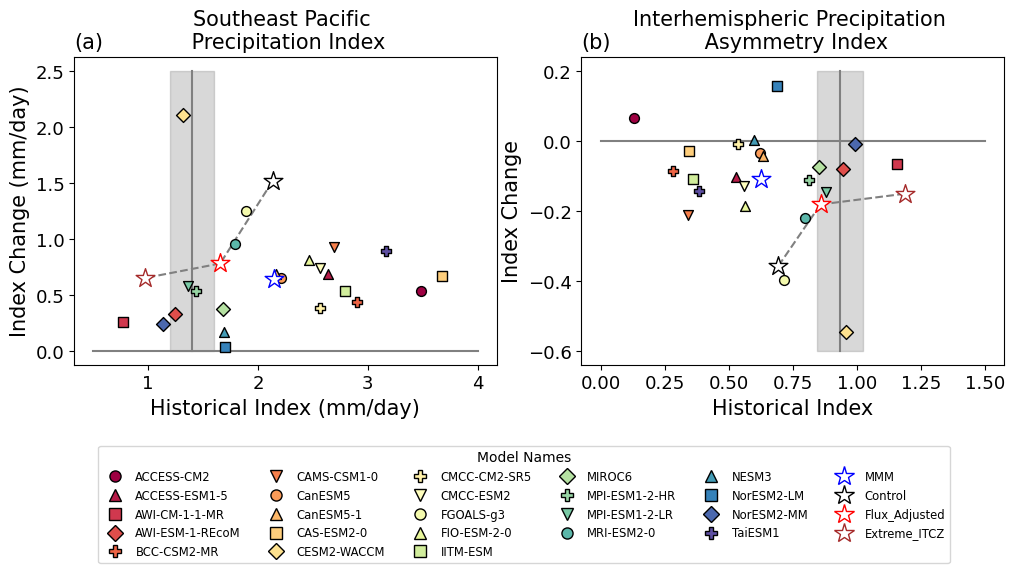

In [15]:
# Define 6 markers that will repeat every 6 models
markers = ['o', '^', 's', 'D', 'P', 'v']

# Generate 18 distinct colors using the "tab20" colormap
colors = plt.cm.Spectral(np.linspace(0, 1, 23))  

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

corr1, p_value1 = pearsonr(pi_asym_index_1[:-1], 
                         np.array(ssp_asym_index_1[:-1]) - np.array(pi_asym_index_1[:-1])
                        )
corr2, p_value2 = pearsonr(pi_asym_index_2[:-1], 
                         np.array(ssp_asym_index_2[:-1]) - np.array(pi_asym_index_2[:-1])
                        )

# Left plot: SPCZ Index
for i, (xi, yi) in enumerate(zip(pi_asym_index_1[:-1], np.array(ssp_asym_index_1[:-1]) - np.array(pi_asym_index_1[:-1]))):
    ax1.scatter(xi, yi, s=50, marker=markers[i % len(markers)], color=colors[i], edgecolor='black', label=model_list_23[i], zorder=2)
ax1.set_xlabel('Historical Index (mm/day)', size=15)
ax1.set_ylabel('Index Change (mm/day)', size=15)

ax1.scatter(pi_asym_index_1[-1], ssp_asym_index_1[-1] - pi_asym_index_1[-1], edgecolor='b', facecolor='white', s=200, marker='*', zorder=2)
ax1.scatter(pre_con_1co2_index_1, pre_con_2co2_index_1-pre_con_1co2_index_1, edgecolor='k', facecolor='white', s=200, marker='*', zorder=2)
ax1.scatter(pre_tri_1co2_index_1, pre_tri_2co2_index_1-pre_tri_1co2_index_1, edgecolor='r', facecolor='white', s=200, marker='*', zorder=2)
ax1.scatter(pre_itcz_1co2_index_1, pre_itcz_2co2_index_1-pre_itcz_1co2_index_1, edgecolor='brown', facecolor='white', s=200, marker='*', zorder=2)

ax1.plot([pre_con_1co2_index_1, pre_tri_1co2_index_1], [pre_con_2co2_index_1-pre_con_1co2_index_1, pre_tri_2co2_index_1-pre_tri_1co2_index_1], 'gray', linestyle='--', zorder=1)
ax1.plot([pre_tri_1co2_index_1, pre_itcz_1co2_index_1], [pre_tri_2co2_index_1-pre_tri_1co2_index_1, pre_itcz_2co2_index_1-pre_itcz_1co2_index_1], 'gray', linestyle='--', zorder=1)

ax1.set_title('(a)', loc='left', size=15)
ax1.set_title('Southeast Pacific \n Precipitation Index', loc='center', size=15)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.plot([0.5, 4.0], [0.0, 0.0], 'gray', linestyle='-', zorder=1)
ax1.plot([pre_rea5_index_1, pre_rea5_index_1], [0.0, 2.5], 'gray', linestyle='-', zorder=1)
ax1.fill_betweenx(
    np.linspace(0.0, 2.5, 100),  # y values
    pre_rea5_index_1 - 0.2,  # x lower bound
    pre_rea5_index_1 + 0.2,  # x upper bound
    color='gray', alpha=0.3, zorder=1  # alpha for transparency
)


# Right plot: Asymmetry Index
for i, (xi, yi) in enumerate(zip(pi_asym_index_2[:-1], np.array(ssp_asym_index_2[:-1]) - np.array(pi_asym_index_2[:-1]))):
    ax2.scatter(xi, yi, s=50, marker=markers[i % len(markers)], color=colors[i], edgecolor='black', label=model_list_23[i], zorder=2)
ax2.set_xlabel('Historical Index', size=15)
ax2.set_ylabel('Index Change', size=15)
ax2.scatter(pi_asym_index_2[-1], ssp_asym_index_2[-1] - pi_asym_index_2[-1], edgecolor='b', facecolor='white', s=200, marker='*', zorder=2)
ax2.scatter(pre_con_1co2_index_2, pre_con_2co2_index_2-pre_con_1co2_index_2, edgecolor='k', facecolor='white', s=200, marker='*', zorder=2)
ax2.scatter(pre_tri_1co2_index_2, pre_tri_2co2_index_2-pre_tri_1co2_index_2, edgecolor='r', facecolor='white', s=200, marker='*', zorder=2)
ax2.scatter(pre_itcz_1co2_index_2, pre_itcz_2co2_index_2-pre_itcz_1co2_index_2, edgecolor='brown', facecolor='white', s=200, marker='*', zorder=2)
ax2.plot([pre_con_1co2_index_2, pre_tri_1co2_index_2], [pre_con_2co2_index_2-pre_con_1co2_index_2, pre_tri_2co2_index_2-pre_tri_1co2_index_2], 'gray', linestyle='--', zorder=1)
ax2.plot([pre_tri_1co2_index_2, pre_itcz_1co2_index_2], [pre_tri_2co2_index_2-pre_tri_1co2_index_2, pre_itcz_2co2_index_2-pre_itcz_1co2_index_2], 'gray', linestyle='--', zorder=1)

ax2.set_title('(b)', loc='left', size=15)
ax2.set_title('Interhemispheric Precipitation \n Asymmetry Index', loc='center', size=15)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.plot([0.0, 1.5], [0.0, 0.0], 'gray', linestyle='-', zorder=1)
ax2.plot([pre_rea5_index_2, pre_rea5_index_2], [-0.6, 0.2], 'gray', linestyle='-', zorder=1)
ax2.fill_betweenx(
    np.linspace(-0.6, 0.2, 100),  # y values
    pre_rea5_index_2 - 0.09,  # x lower bound
    pre_rea5_index_2 + 0.09,  # x upper bound
    color='gray', alpha=0.3, zorder=1  # alpha for transparency
)

#ax1.text(0.03, 0.97, f'Corr: {corr1:.2f}\nP-value: {p_value1:.2f}',
#         transform=ax1.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left',
#         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

#ax2.text(0.03, 0.97, f'Corr: {corr2:.2f}\nP-value: {p_value2:.2f}',
#         transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left',
#         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))



# Create legend with correct markers and colors
legend_elements = [
    Line2D([0], [0], marker=markers[i % len(markers)], color=colors[i], markeredgecolor='black', linestyle='None', markersize=8, label=model)
    for i, model in enumerate(model_list_23)
]
legend_elements.append(Line2D([0], [0], marker='*', markerfacecolor='w', markeredgecolor='b', linestyle='None', markersize=15, label='MMM'))
legend_elements.append(Line2D([0], [0], marker='*', markerfacecolor='w', markeredgecolor='k', linestyle='None', markersize=15, label='Control'))
legend_elements.append(Line2D([0], [0], marker='*', markerfacecolor='w', markeredgecolor='r', linestyle='None', markersize=15, label='Flux_Adjusted'))
legend_elements.append(Line2D([0], [0], marker='*', markerfacecolor='w', markeredgecolor='brown', linestyle='None', markersize=15, label='Extreme_ITCZ'))

fig.legend(
    handles=legend_elements,
    title="Model Names",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.4),  
    fontsize='small',
    ncol=6,  
)


fig.savefig("Fig2.pdf", dpi=300, bbox_inches="tight")
#fig.savefig("scatter_plots.png", dpi=300, bbox_inches="tight")

